In [278]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import random

In [279]:
X = np.array([
    [5.1, 3.5],
    [4.9, 3.0],
    [5.8, 2.7],
    [6.0, 3.0],
    [6.7, 3.1],
    [4.5, 2.3],
    [6.1, 2.8],
    [5.2, 3.2],
    [5.5, 2.6],
    [5.0, 2.0],
    [8.0, 0.5],
    [7.5, 0.8],
    [8.1, -0.1],
    [2.5, 3.5],
    [1.0, 3.0],
    [4.5, -1.0],
    [3.0, -0.5],
    [5.1, -0.2],
    [6.0, -1.5],
    [3.5, -0.1],
    [4.0, 0.0],
    [6.1, 0.5],
    [5.4, -0.5],
    [5.3, 0.3],
    [5.8, 0.6]
])





def func(X, u, m):
    #assignment
    clusters = []
    for i in range(m):
        clusters.append([])
    for x in X:
        d2= (u[0][0]-x[0])**2 + (u[0][1]-x[1])**2
        ind = 0
        for i in range(m):
            d = (u[i][0]-x[0])**2 + (u[i][1]-x[1])**2
            if d < d2:
                d2 = d
                ind = i
        clusters[ind].append(x)
    for i in range(m):
        if(len(clusters[i]) != 0):
            clusters[i] = np.array(clusters[i])

    #Update
    for i in range(m):
        if(len(clusters[i]) != 0):
            u[i] = np.mean(clusters[i], axis=0)
    return clusters, u

#initialisation
m = 5
ustart = [[4,0], [2.0, 3.0],[5.0, 0.0], [6.0, 3.0], [8.0, 0.0]]

u = ustart.copy()
# convergence check 
prev_u = u
for i in range(1000):
    clusters, u = func(X, u, m)
    # change = ((prev_u1 - u1)**2 + (prev_u2 - u2)**2)
    # if np.all(prev_u1 == u1) and np.all(prev_u2 == u2):
    #     break
    # prev_u1 = u1
    # prev_u2 = u2


[array([ 3.75, -0.4 ]), array([1.75, 3.25]), array([ 5.61666667, -0.13333333]), array([5.48, 2.82]), array([7.86666667, 0.4       ])]
[[4, 0], [2.0, 3.0], [5.0, 0.0], [6.0, 3.0], [8.0, 0.0]]


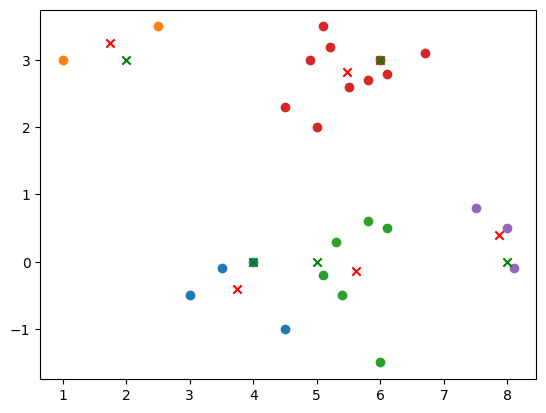

In [280]:
figure = plt.figure()
print(u)
print(ustart)
# print(u2)   
# print(cluster1)
# print(cluster2)
for i in range(m):
    if(len(clusters[i])>0):
        plt.scatter(clusters[i][:,0], clusters[i][:,1])
plt.scatter(np.array(u)[:,0], np.array(u)[:,1], c='red', marker='x')
plt.scatter(np.array(ustart)[:,0], np.array(ustart)[:,1], c='green', marker='x')
plt.show()

# print(u1, u2)

[array([5.224, 1.34 ])]
[[6.0864126603392394, 2.0341766378653743]]


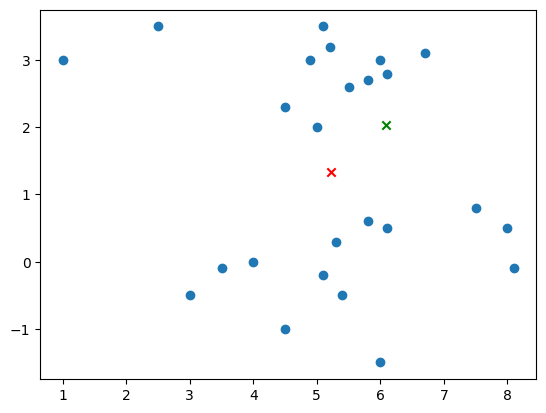

[array([5.83, 1.38]), array([2.8 , 1.18])]
[[5.835453366923714, 0.885911612799807], [1.9718529703006595, -0.49396251158559323]]


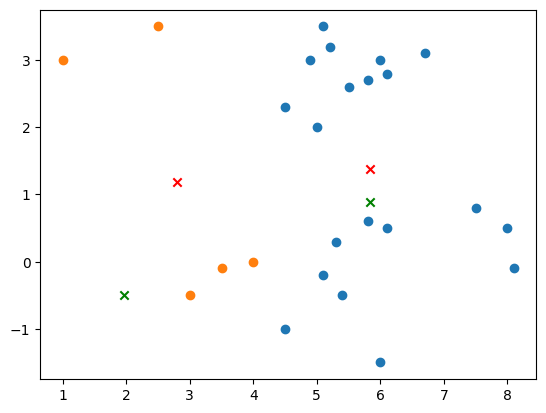

[array([ 3.75, -0.4 ]), array([6.36666667, 0.04444444]), array([4.85833333, 2.89166667])]
[[1.7985126342013302, -0.38874496345833554], [3.938080031510242, -1.3887630272073832], [2.9550090191816887, 1.5355605697827253]]


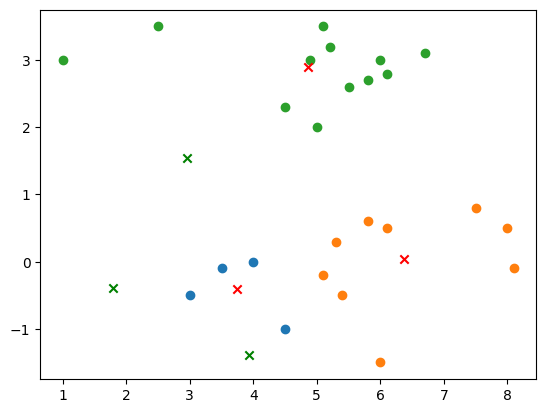

[array([ 4.6   , -0.4375]), array([7.1 , 0.46]), array([5.48, 2.82]), array([1.75, 3.25])]
[[2.228796692574281, 0.30047323970534023], [7.336684843599186, 3.290016816066524], [4.373994574304287, 3.830908981720601], [2.933351097072715, 1.9896077006308097]]


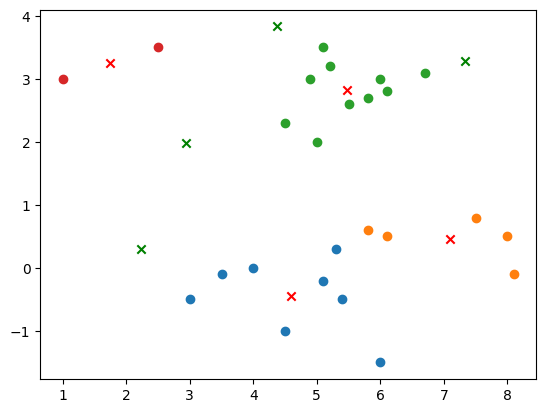

[array([5.48, 2.82]), array([ 5.45714286, -0.25714286]), array([7.86666667, 0.4       ]), array([1.75, 3.25]), array([ 3.5, -0.2])]
[[5.1079437624866815, 2.1903230989055187], [5.484138628481505, -0.3715648496015862], [5.943751949192768, 0.7830134142920393], [3.8490849661809836, 1.4558386154324916], [2.7821541649560313, -1.9246663484718063]]


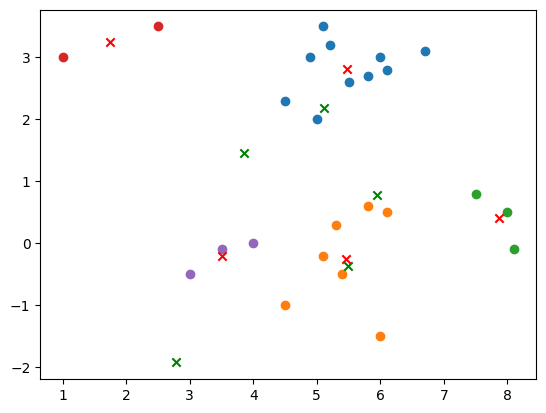

[array([4.53333333, 2.91666667]), array([ 5.275, -0.225]), array([7.86666667, 0.4       ]), array([2.5, 0.8]), array([6.7, 3.1]), array([5.85 , 2.775])]
[[5.590023945976071, 2.1908365792171764], [5.0914077291725786, -1.1105641276566975], [7.024196088484101, -0.8408143158449966], [2.250436199206405, -1.3142037227064154], [7.424837133892864, 3.4993026815468466], [6.0502773711190265, 2.212102727259463]]


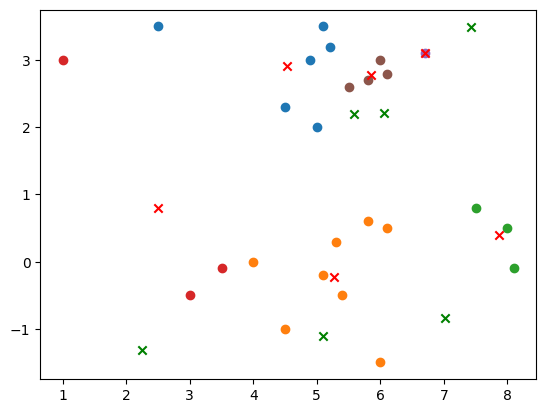

[array([7.86666667, 0.4       ]), array([ 3.5, -0.2]), array([1.75, 3.25]), array([4.94, 2.8 ]), array([ 5.45714286, -0.25714286]), [1.984195890246252, -1.7122906303880447], array([6.02, 2.84])]
[[7.694781177183308, 2.1555597869108922], [2.3636188133557536, 0.7768631930049077], [1.9719131616463152, 1.6943262839473805], [4.233115600866715, 3.742727980079687], [3.9628604862581067, -0.7647797786434103], [1.984195890246252, -1.7122906303880447], [4.847510575001185, 1.6625370794645744]]


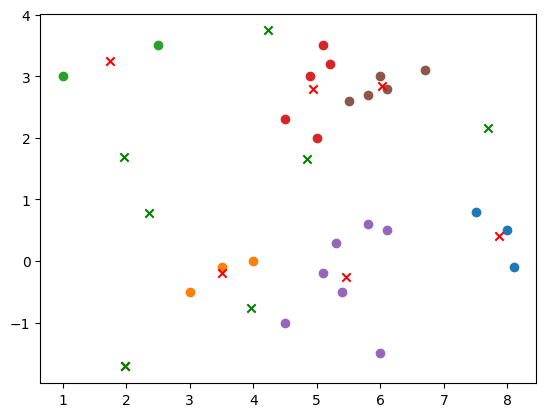

[array([7.86666667, 0.4       ]), array([6.02, 2.84]), array([ 3.75, -0.4 ]), array([4.75, 2.15]), array([1.75, 3.25]), array([ 5.61666667, -0.13333333]), array([5.06666667, 3.23333333]), [2.057617120179771, 2.33197884821808]]
[[6.544818890778219, 1.175464017364475], [6.479317915349053, 2.603793162794516], [3.0732663372356086, -1.6078521276020914], [4.358849759323104, 2.110705186082968], [2.0439634332796106, 2.9402247830179498], [5.198168435353797, 0.5199115332183748], [4.500179187773727, 3.5571960308354518], [2.057617120179771, 2.33197884821808]]


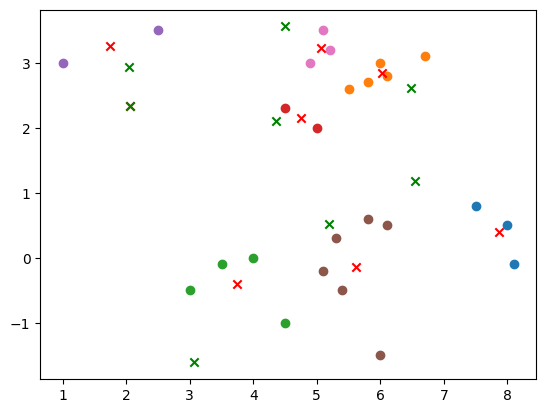

[array([ 3. , -0.5]), array([7.86666667, 0.4       ]), array([1.75, 3.25]), array([ 6. , -1.5]), array([6.02, 2.84]), [7.376197510966124, -1.1612418995334652], array([4.94, 2.8 ]), array([5.54, 0.14]), array([ 4.        , -0.36666667])]
[[3.0656811423435624, -0.28593230885178955], [7.548821743638681, 0.6625667819971373], [3.629515707164309, 2.1759271262887045], [6.474625154753959, -1.5469794551261244], [4.878706841406369, 3.6023449584508533], [7.376197510966124, -1.1612418995334652], [4.434393729109784, 3.5451934371039693], [4.094091134204453, 0.15967784520301231], [3.589905548262147, 0.28480193047868907]]


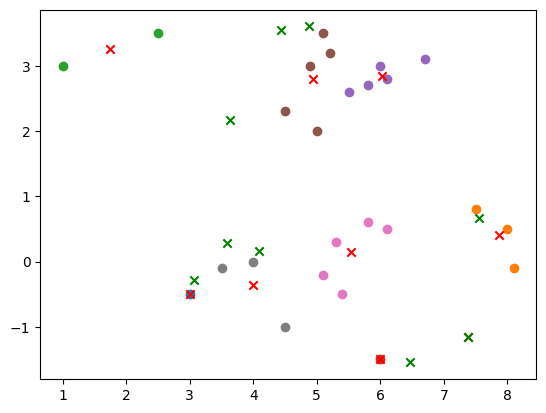

[array([6.1, 0.5]), array([ 5.25, -0.8 ]), [1.0074790489983103, -0.8515534226646586], [1.3730367059926811, -1.7577636199178992], array([5.55, 0.45]), array([1.75, 3.25]), array([5.6625, 2.9875]), array([7.86666667, 0.4       ]), array([ 3.5, -0.2]), array([4.75, 2.15])]
[[6.526635877656055, 1.0985629036132192], [5.654727220800006, -1.7508680968859849], [1.0074790489983103, -0.8515534226646586], [1.3730367059926811, -1.7577636199178992], [6.0871905985842485, 1.2953069833898865], [2.4063278056754474, 2.2841088921701953], [5.151377614882573, 2.3810981969111946], [7.265762060499354, 1.6828515491159433], [1.6399564972386704, 0.034611572970867144], [4.254361497340154, 2.6099589692052003]]


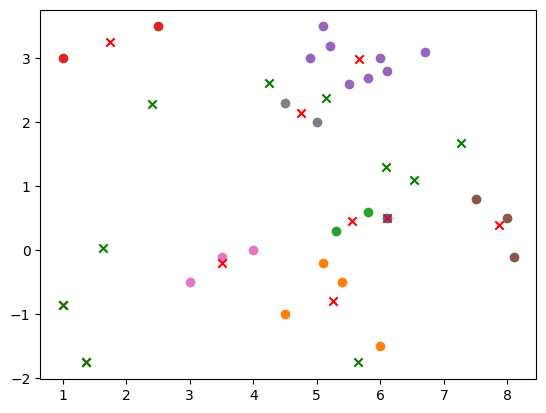

In [281]:
#elbow method

for i in range(10):
    m = i+1
    u = []
    for j in range(m):
        u.append([random.uniform(1, 8), random.uniform(-2, 4)])
    ustart = u.copy()
    for i in range(100):
        clusters, u = func(X, u, m)
    print(u)
    print(ustart)
    figure = plt.figure()
    for i in range(m):
        if(len(clusters[i])>0):
            plt.scatter(clusters[i][:,0], clusters[i][:,1])
    plt.scatter(np.array(u)[:,0], np.array(u)[:,1], c='red', marker='x')
    plt.scatter(np.array(ustart)[:,0], np.array(ustart)[:,1], c='green', marker='x')
    plt.show()
    
    